In [ ]:
import pandas as pd
df = pd.read_csv('Updated_Tourist_Spot_Keywords_DataFrame_UTF8 (1).csv', encoding = 'utf-8')
df.head()

,Keywords,label,지역,관광지명,주소,X 좌표,Y 좌표
0,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,방촌종합시장,대구 동구 동촌로46길 2-0,128.6645,35.8812
1,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,평화시장,대구 동구 아양로9길 10-0,128.6192,35.8830
2,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,동구시장,대구 동구 효목로 8-0,128.6398,35.8744
3,"대형마트, 쇼핑, 회원제",4,대구,코스트코홀세일/대구혁신도시점,대구 동구 첨단로 10-0,128.7307,35.8769
4,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,불로전통시장,대구 동구 팔공로26길 9-1,128.6420,35.9108


In [ ]:
df.shape

(289, 7)

In [ ]:
import math
def distance(dataframe, lon, lat):
  dataframe['distance'] = 0
  lat1_rad = math.radians(lat)
  lon1_rad = math.radians(lon)
  for i in range(len(dataframe)):
    R = 6371.0

    lat2_rad = math.radians(dataframe.iloc[i, 6])
    lon2_rad = math.radians(dataframe.iloc[i, 5])

    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # 해버사인 공식
    a = math.sin(delta_lat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(delta_lon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # 두 지점 사이의 거리
    distance = R * c

    dataframe['distance'][i] = distance

  return dataframe

In [ ]:
df2 = df.drop_duplicates(subset='관광지명', keep='first')
df2.shape

(289, 7)

In [ ]:
df2 = df2.dropna()

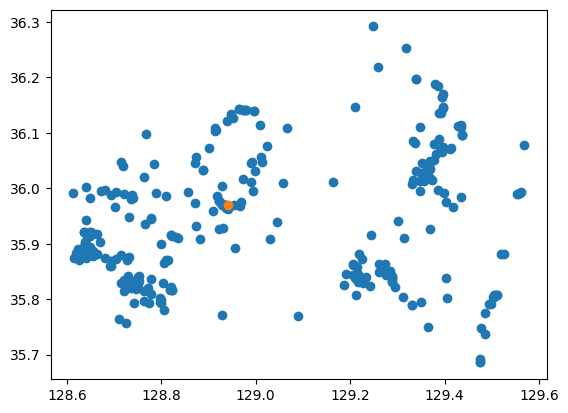

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df2['X 좌표'], df2['Y 좌표'])
plt.scatter(128.940775, 35.97)
plt.show()

In [ ]:
import folium
m = folium.Map([35.97, 128.940775], zoom_start = 12, width = '%100', height = '%100')
locations = list(zip(df2['Y 좌표'], df2['X 좌표']))
for i in range(len(locations)):
  folium.CircleMarker(location = locations[i], radius = 1).add_to(m)
m

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-12-50e1bb41b249>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 100)  # 20개의 기본 색을 사용


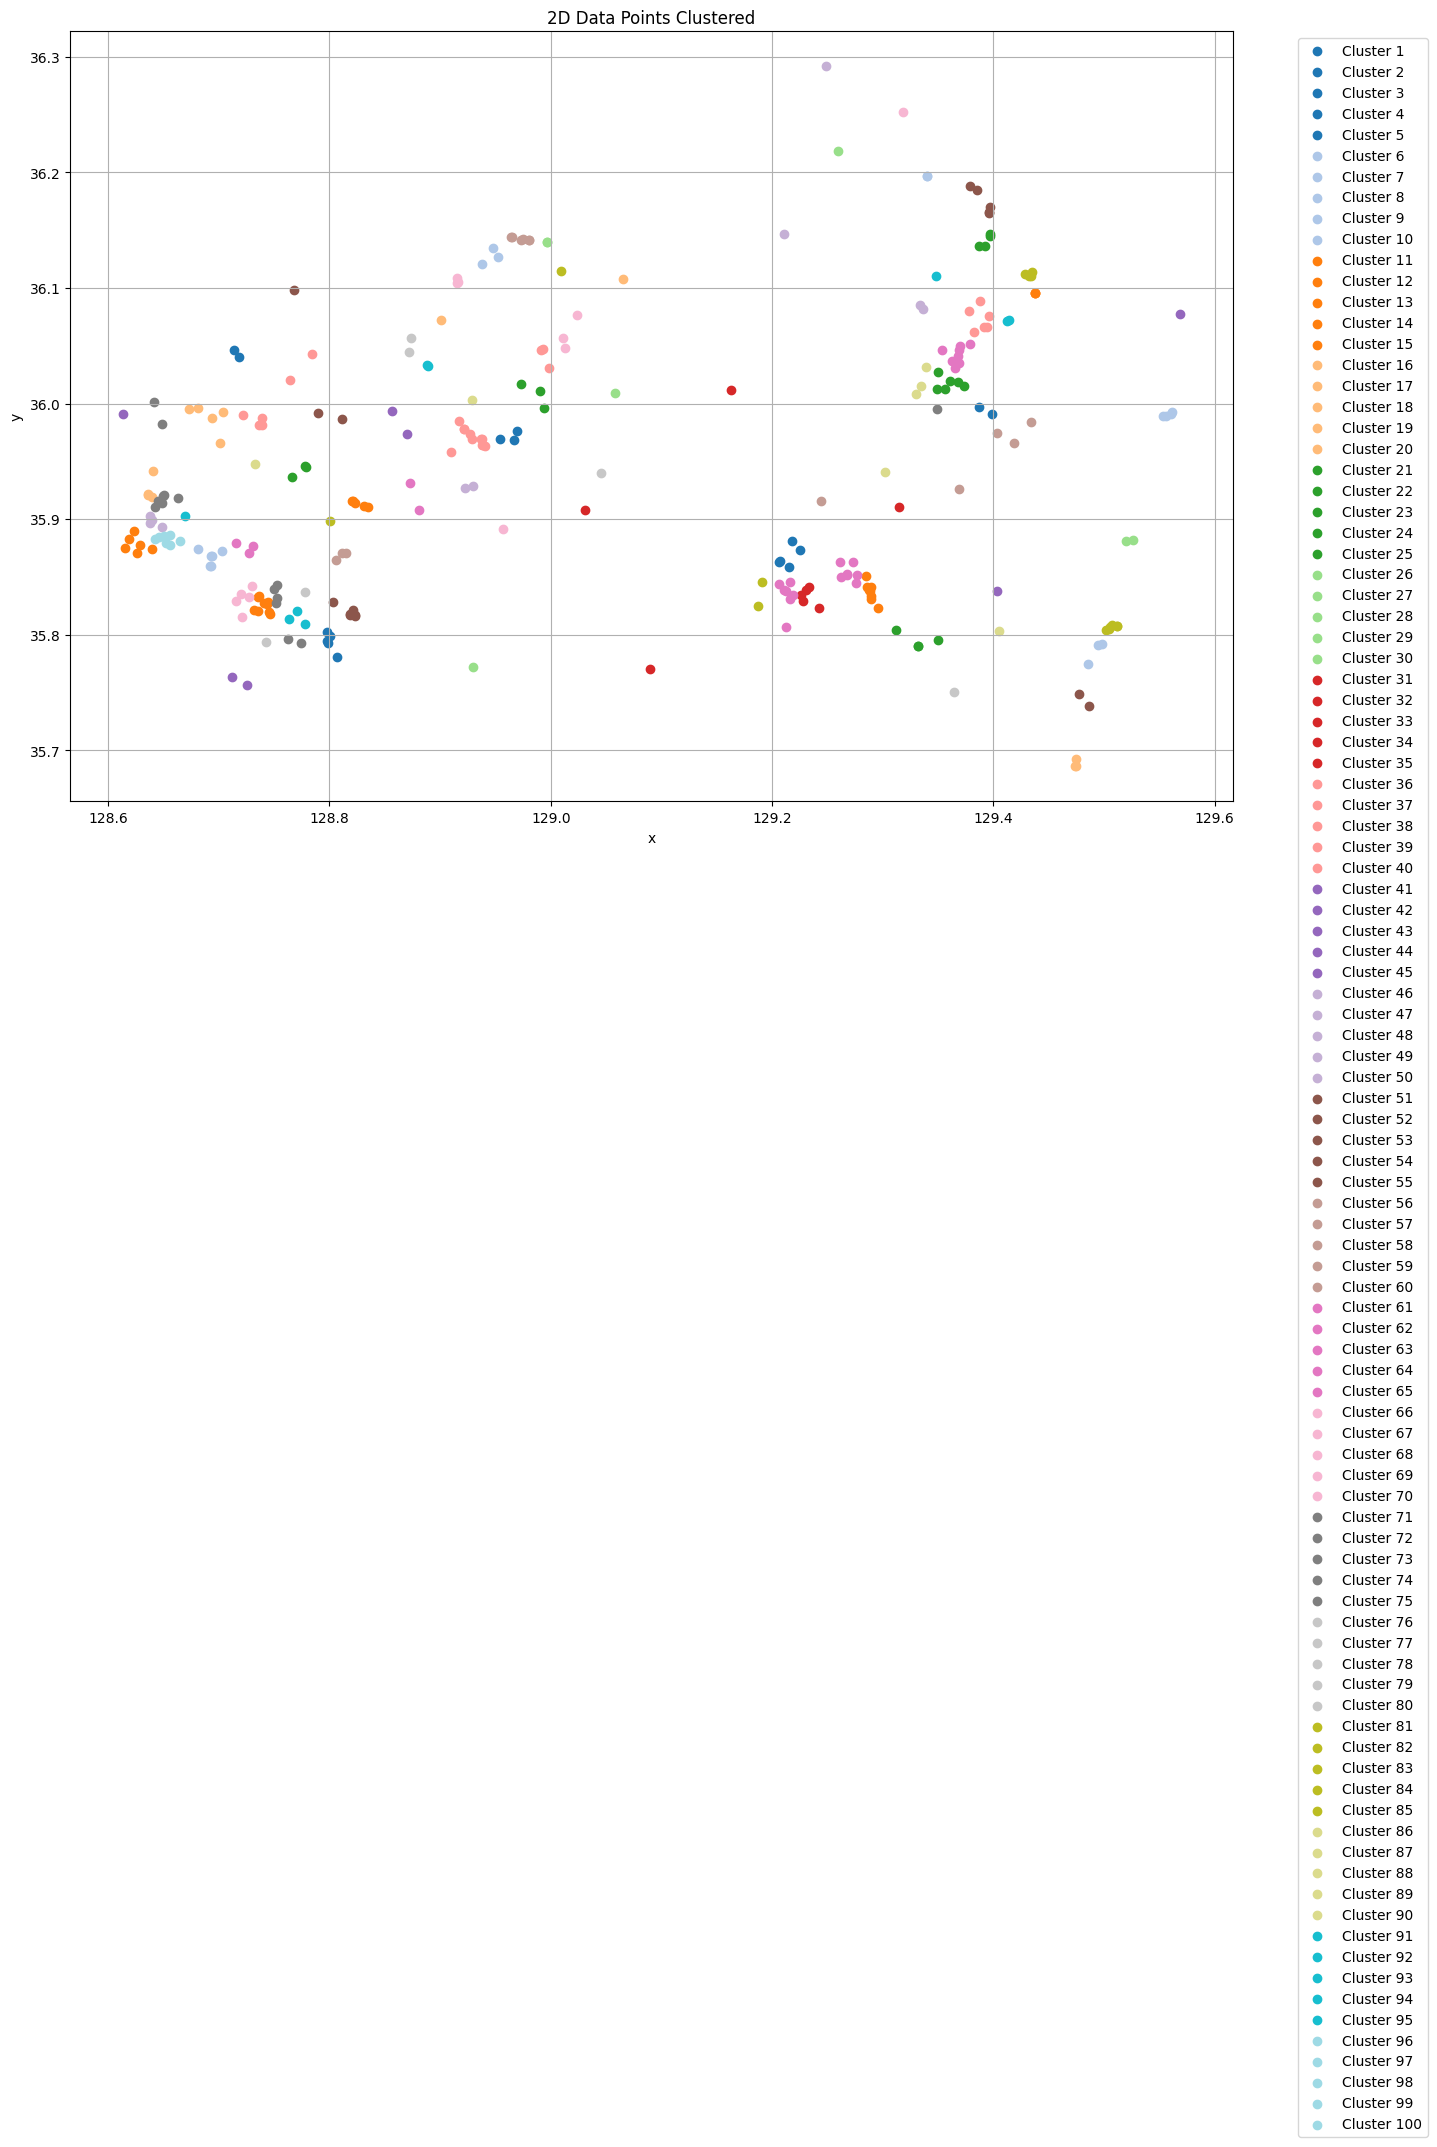

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
df3 = df2.loc[:,:]

# K-means 클러스터링을 사용하여 100개의 클러스터로 그룹화 (300개의 데이터를 3개씩 묶기 위해 100개의 클러스터로)
kmeans = KMeans(n_clusters=96, random_state=0).fit(df3[['Y 좌표', 'X 좌표']])

# 클러스터 라벨을 데이터프레임에 추가
df3['cluster'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# 클러스터 중심 좌표를 새로운 열로 추가
df3['center_Y 좌표'] = df3['cluster'].apply(lambda x: cluster_centers[x][0])
df3['center_X 좌표'] = df3['cluster'].apply(lambda x: cluster_centers[x][1])

# 클러스터별로 다른 색으로 산점도 그리기
plt.figure(figsize=(15, 10))
colors = plt.cm.get_cmap('tab20', 100)  # 20개의 기본 색을 사용

for cluster in range(100):
    clustered_data = df3[df3['cluster'] == cluster]
    plt.scatter(clustered_data['X 좌표'], clustered_data['Y 좌표'], color=colors(cluster), label=f'Cluster {cluster + 1}')

plt.title('2D Data Points Clustered')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
import folium
import matplotlib.colors as mcolors
m = folium.Map([35.97, 128.940775], zoom_start = 12, width = '%100', height = '%100')
locations = list(zip(df3['Y 좌표'], df3['X 좌표']))
colors = plt.cm.get_cmap('tab20', 100)
for i in range(len(locations)):
  cluster = df3['cluster'].iloc[i]
  color = colors(cluster)[:3]  # RGBA 값에서 RGB 값만 추출
  color = mcolors.rgb2hex(color)  # RGB 값을 HEX로 변환
  folium.CircleMarker(location=locations[i], radius=1, color=color, fill=True, fill_color=color).add_to(m)
m

<ipython-input-13-f8ae420e09b1>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', 100)


In [ ]:
df3.head(10)

,Keywords,label,지역,관광지명,주소,X 좌표,Y 좌표,cluster,center_Y 좌표,center_X 좌표
0,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,방촌종합시장,대구 동구 동촌로46길 2-0,128.6645,35.8812,95,35.882429,128.652486
1,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,평화시장,대구 동구 아양로9길 10-0,128.6192,35.8830,13,35.878400,128.625500
2,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,동구시장,대구 동구 효목로 8-0,128.6398,35.8744,13,35.878400,128.625500
3,"대형마트, 쇼핑, 회원제",4,대구,코스트코홀세일/대구혁신도시점,대구 동구 첨단로 10-0,128.7307,35.8769,60,35.875633,128.724467
4,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,불로전통시장,대구 동구 팔공로26길 9-1,128.6420,35.9108,73,35.916583,128.649917
5,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,반야월종합시장,대구 동구 율하동로 144-0,128.7032,35.8723,6,35.867117,128.692833
6,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,효목시장,대구 동구 효동로15길 0-0,128.6427,35.8829,95,35.882429,128.652486
7,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,공항시장,대구 동구 해동로3길 6-0,128.6381,35.8964,45,35.898180,128.640300
8,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,대구,송라시장,대구 동구 동부로5길 14-0,128.6154,35.8746,13,35.878400,128.625500
9,"방문, 쇼핑, 음식, 맛집, 전통, 문화",4,경산,경산공설시장,경북 경산시 경안로31길 19-0,128.7352,35.8207,14,35.825200,128.739967


In [ ]:
df5 = pd.DataFrame(columns=['관광지명', 'cluster', 'center_Y', 'center_X'])
for i in range(96):
  df4 = df3[df3['cluster'] == i]
  data = pd.DataFrame({'관광지명': [df4['관광지명']], 'cluster' : [i], 'center_Y' : [df4.iloc[0, 8]], 'center_X' : [df4.iloc[0, 9]]})
  df5 = pd.concat([df5, data], ignore_index=True)
df5.head()

,관광지명,cluster,center_Y,center_X
0,10 브리프저니 51 백양지 89 삼성현역사...,0,35.793600,128.80026
1,"173 포스코역사관 224 이마트/포항점 Name: 관광지명, dtyp...",1,35.994200,129.39295
2,24 영천농산물도매시장 255 조교파크골프장 276 영천강변...,2,35.971267,128.96330
3,62 빛누리정원 131 경주예술의전당 137 롯데시...,3,35.867780,129.21428
4,"65 치산계곡 166 수도사 Name: 관광지명, dtype: object",4,36.043250,128.71605


In [ ]:
for i in range(len(df5)):
  index = str(df5['관광지명'][i]).find("Name")
  df5['관광지명'][i] = str(df5['관광지명'][i])[:index]

<ipython-input-21-7d53184a650d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['관광지명'][i] = str(df5['관광지명'][i])[:index]
<ipython-input-21-7d53184a650d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['관광지명'][i] = str(df5['관광지명'][i])[:index]
<ipython-input-21-7d53184a650d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['관광지명'][i] = str(df5['관광지명'][i])[:index]
<ipython-input-21-7d53184a650d>:3: SettingWithCopyWarning: 
A

In [ ]:
df5.head()

,관광지명,cluster,center_Y,center_X
0,10 브리프저니\n51 백양지\n89 삼성현...,0,35.793600,128.80026
1,173 포스코역사관\n224 이마트/포항점\n,1,35.994200,129.39295
2,24 영천농산물도매시장\n255 조교파크골프장\n276 영천...,2,35.971267,128.96330
3,62 빛누리정원\n131 경주예술의전당\n137 롯...,3,35.867780,129.21428
4,65 치산계곡\n166 수도사\n,4,36.043250,128.71605


여기까지가 클러스터 만들고, 클러스터별로 구분해 묶은 상황입니다. 관광지명에서 숫자랑 /n 나오는건 어떻게 없앨지 모르겠어요.
이제 사용자 위치 받아서 클러스터별로 거리 구하고(위에 거리 구하는 함수 있음), 거리별로 가중치만 설정하면 될 듯 합니다.
엇 근데 추시에서는 관광지별로 점수 나오고 거리에서는 클러스터별로 점수가 나오면
안되지 않나? 하는 생각이 들긴 하는데 그러면 거리도 관광지 기준으로 하고
같은 클러스터를 코스로 추천하는 식으로 해야될지도요